In [27]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#Running the script with parameter definitions and functions:
%run populations_functions.py

K = 1; 0.5*dg/dt = 1250.0
D = 50.0; 0.5*dg**2/dt = 500.00000000000006


<Figure size 432x288 with 0 Axes>

In [22]:
#Choosing a sugar level and finding the regulation peak:
sug = 200
fit = fitness(g,sug,delta)
g_reg = g[np.argmax(fit)]
print(f"g_reg={round(g_reg,2)}")

alpha = 5
delta = 1700/g_max

#Generating the initial distributions:
g_peak = 0.5*(g_min+g_max)
#We don't want a standard deviation of 0, so even if the g_reg is 0, we set the s.d. of p0_reg to 1:
p0_unreg = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
p0_unreg = p0_unreg/np.trapz(p0_unreg,dx=dg)
# p0_unreg = np.ones_like(g)
# p0_unreg = p0_unreg/np.trapz(p0_unreg,dx=dg)
p0_reg = Gaussian(g,g_reg,np.maximum(np.sqrt(alpha*g_reg),1))
p0_reg = p0_reg/np.trapz(p0_reg,dx=dg)

g_reg=73.2


In [23]:
p_unreg,p_reg = selection(p0_unreg,p0_reg,sug,alpha,delta)

In [24]:
(mean_wrt_P(fitness(g,sug,delta),p0_reg,g)-np.min(fitness(g,sug,delta)))/(np.max(fitness(g,sug,delta))-np.min(fitness(g,sug,delta)))

0.9187304203823653

In [25]:
(mean_wrt_P(fitness(g,sug,delta),p_unreg,g)-np.min(fitness(g,sug,delta)))/(np.max(fitness(g,sug,delta))-np.min(fitness(g,sug,delta)))

0.9750943024309052

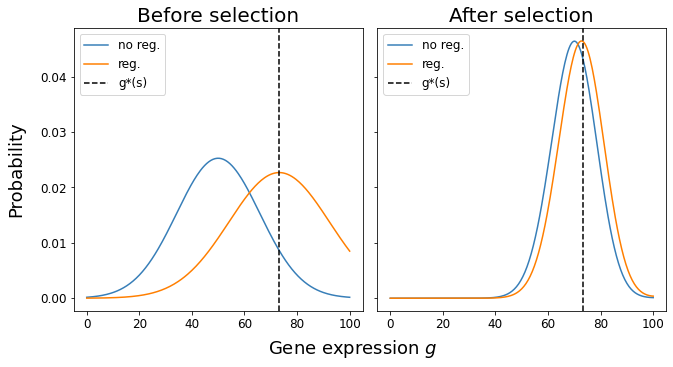

In [26]:
fig, ax = plt.subplots(1, 2, sharex = 'col', sharey = 'row',figsize=[9,4.8])
fig.tight_layout(pad =3.0)
ax1,ax2 = ax[0],ax[1]

ax1.plot(g, p0_unreg,color=CB_colors[0],label="no reg.")
ax1.plot(g, p0_reg,color=CB_colors[1],label="reg.")
ax1.axvline(x=g_reg, label="g*(s)", color='k', linestyle='--')
ax1.set_title("Before selection",fontsize=20)
ax1.legend(loc="best",fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=10)

ax2.plot(g, p_unreg,color=CB_colors[0],label="no reg.")
ax2.plot(g, p_reg,color=CB_colors[1],label="reg.")
ax2.axvline(x=g_reg, label="g*(s)", color='k', linestyle='--')
ax2.set_title("After selection",fontsize=20)
ax2.legend(loc="best",fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='minor', labelsize=10)

fig.text(0.5, -0.02, r"Gene expression $g$", ha='center', va='center', fontsize=18)
fig.text(-0.02, 0.5, "Probability", ha='center', va='center', rotation='vertical', fontsize=18)

plt.tight_layout()

# plt.savefig("0_distributions.svg",pad_inches=0.3,bbox_inches='tight',format='svg')
# plt.savefig("0_distributions.eps",pad_inches=0.3,bbox_inches='tight',format='eps')